### Problem Description

## is to analysis the data and clean it and calculate the revenue of the top 10 customer and them countrys and the revenue par the time 

Write some details about the problem

## Packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)

from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge


### Read Dataset

In [3]:
df = pd.read_csv("C:/Users/20106/Desktop/Online Retail.CSV", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [5]:
missing_percentage =df.isna().sum()/df.shape[0]
missing_percentage

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [6]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
... ## Write your code here
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [7]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

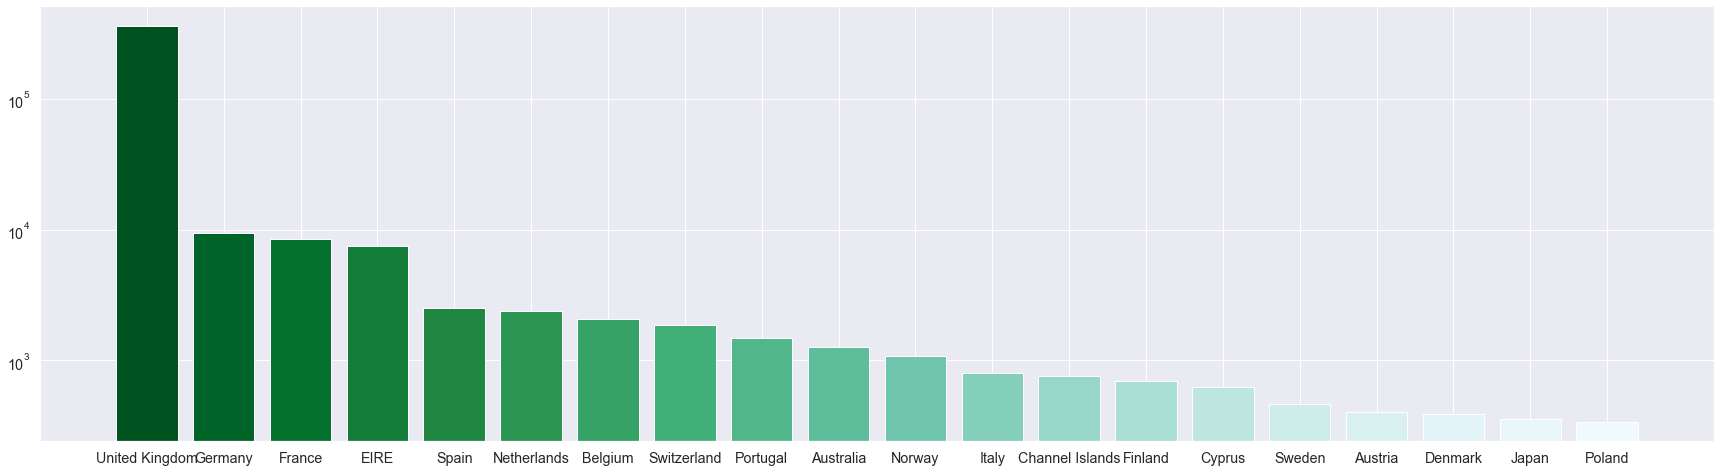

In [8]:
x=df.Country.value_counts()[:20]
x_label=x.index
plt.figure(figsize=(30,8))
plt.bar(x_label,x,0.8,color=sns.color_palette('BuGn_r',len(x)))
plt.yscale('log')
plt.show()

### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [9]:
df['Revenue']=df.UnitPrice*df.Quantity
x=df.groupby('CustomerID')['Revenue'].sum()
df_top_10=x.sort_values(0,False).reset_index()
df_top_10=df_top_10[:10]
df_top_10

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [10]:
df_top_cust=df.CustomerID.value_counts()[:5]

df_top_cust=df_top_cust.reset_index()
df_top_cust.rename({'CustomerID':'Frequency','index':'CustomerID'},axis='columns')

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [11]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

C:\Users\20106\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


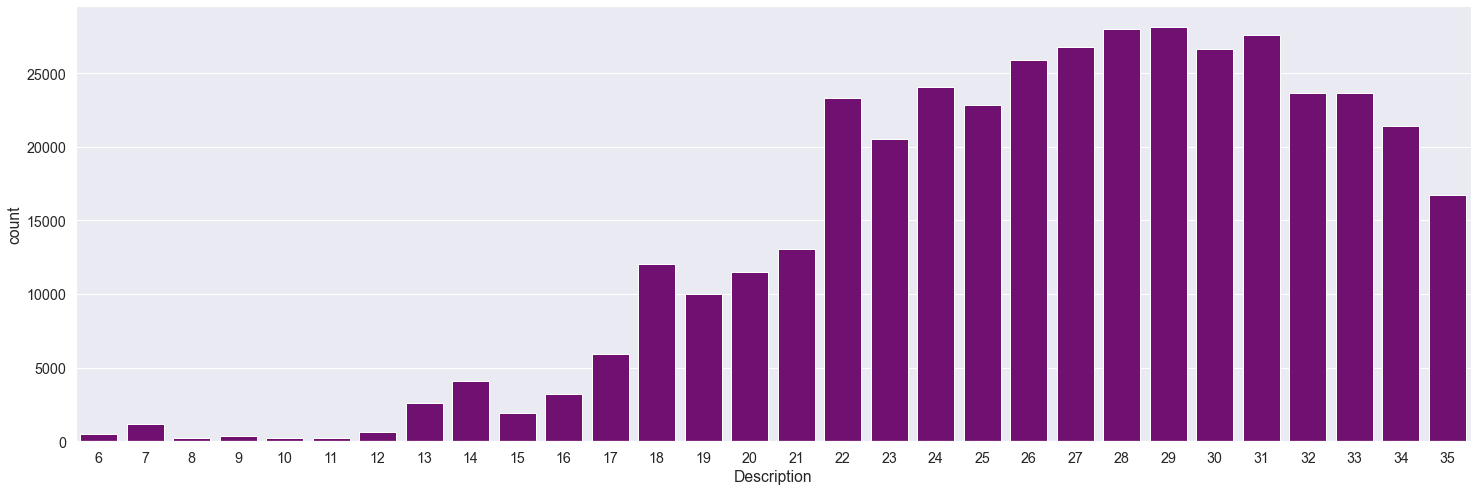

In [69]:
v=df.Description.str.len()
v=pd.Series(v)
plt.figure(figsize=(25,8))
sns.countplot(v,color='Purple')
plt.show()


### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [ ]:
import datetime as dt
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.day_of_year
df["Date"] = df.InvoiceDate.dt.date

<ipython-input-14-3ea8bf5ac4de>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.InvoiceDate.dt.week


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [ ]:
grouped_features = ["Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode", "Description"]

In [ ]:
daily_data = pd.DataFrame(df.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data["Revenue"] = df.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head()

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Description,Quantity,Revenue
0,2010,4,12,48,2,335,1,10002,INFLATABLE POLITICAL GLOBE,60,51.00
1,2010,4,12,48,2,335,1,10125,MINI FUNKY DESIGN TAPES,2,1.70
2,2010,4,12,48,2,335,1,10133,COLOURING PENCILS BROWN TUBE,5,4.25
3,2010,4,12,48,2,335,1,15044B,BLUE PAPER PARASOL,1,2.95
4,2010,4,12,48,2,335,1,15056BL,EDWARDIAN PARASOL BLACK,20,113.00


## (Optional Part)
#### You Can go on with the Modelling part using any type of 
  - ML model 
  - features pre-processing 
  - Loss function

as mentioned in the Questions

### Modelling

# Great Job
### Now go through the Food Review Notebook